# Step 1: Import necessary libraries.

In [1]:
# Import os library to print the full path of all the files in the directory `E:/Projects/`
import os
for dirname, _, filenames in os.walk('E:/Projects/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


E:/Projects/Algorithmic Trading - Backtesting (SMA) (1).ipynb
E:/Projects/Algorithmic Trading - Backtesting (SMA).pdf
E:/Projects/Algorithmic Trading - Backtesting (SMA).zip
E:/Projects/Backtesting using (RSI & MA).ipynb
E:/Projects/Backtesting using (RSI & MA).pdf
E:/Projects/Backtesting using (RSI & MA).zip
E:/Projects/Cover_Letter.docx
E:/Projects/job_descriptions.pdf
E:/Projects/Resume.csv
E:/Projects/Resume.pdf
E:/Projects/Resume1.csv
E:/Projects/Resume2.csv
E:/Projects/training_data.csv
E:/Projects/{Sanket_Vilas_Patil}_CV.pdf
E:/Projects/archive\creditcard.csv
E:/Projects/archive\kc_house_data.csv
E:/Projects/archive\spam.csv
E:/Projects/archive\WA_Fn-UseC_-Telco-Customer-Churn.csv
E:/Projects/data\data\ACCOUNTANT\10554236.pdf
E:/Projects/data\data\ACCOUNTANT\10674770.pdf
E:/Projects/data\data\ACCOUNTANT\11163645.pdf
E:/Projects/data\data\ACCOUNTANT\11759079.pdf
E:/Projects/data\data\ACCOUNTANT\12065211.pdf
E:/Projects/data\data\ACCOUNTANT\12202337.pdf
E:/Projects/data\data\ACCOU

In [2]:
import pandas as pd                      ##These lines import additional libraries that will be used in the code:    
import numpy as np
import sklearn as sns                    #Scikit-learn for machine learning
import matplotlib.pyplot as plt          #Matplotlib for plotting
from tqdm.auto import tqdm               #TQDM for progress bars
import datasets                          #Datasets and Transformers for natural language processing
import transformers

In [3]:
pip install numpy --upgrade

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Step 2: Load resume and job description data.

In [4]:
# Read the resume data from a CSV file and drop the `Resume_html` column
resume_data=pd.read_csv(r"E:\Projects\Resume.csv")
resume_data=resume_data.drop(["Resume_html"],axis=1)

In [5]:
#This function extracts the text from a PDF file.
from pypdf import PdfReader

def pdf_text(filePath:str)->str:
    reader = PdfReader(filePath)
    text=""
    for page in reader.pages:
        text+=page.extract_text()
    return text

# Step 3: Preprocess the text of the resumes and job descriptions.

In [6]:
# Define a function to preprocess the text
from nltk import pos_tag
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
import string
import re

puncuation=set(string.punctuation)
stop_words_english=set(stopwords.words("english"))
def preprocess_text(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    sentences = sent_tokenize(text)
    features = {'feature': ""}

    for sent in sentences:
        for criteria in ['skills', 'education']:
            if criteria in sent:
                words = word_tokenize(sent)
                words = [word for word in words if word not in stop_words_english]
                # Use a part-of-speech (POS) tagger to identify and remove stop words and other irrelevant words.
                tagged_words = pos_tag(words)
                filtered_words = [word for word, tag in tagged_words if tag not in ['DT', 'IN', 'TO', 'PRP', 'WP']]
                features['feature'] += " ".join(filtered_words)

    return features

In [7]:
progress_bar=tqdm(range(len(resume_data)))
# Extract text from the CSV or PDF file.
# If the `Resume_str` column is present in the CSV file, use that.
# Otherwise, use the `pdf_text` function to extract text from the PDF file.
def process(df):    
    id=df['ID']
    category=df['Category'] 
    text=pdf_text(f"E:/Projects/data/data/{category}/{id}.pdf")   
    features=preprocess_text(text)
    df['Feature']=features['feature']
    progress_bar.update(1)
    return df
# Process the resume data.
resume_data=resume_data.apply(process,axis=1)
resume_data=resume_data.drop(columns=['Resume_str'])

  0%|          | 0/2484 [00:00<?, ?it/s]

In [27]:
# Use the NLTK averaged perceptron tagger to identify and remove stop words and other irrelevant words.
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sanket\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [9]:
# Save the processed resume data to a CSV file to avoid recomputing it in the future.
resume_data.to_csv(r"E:\Projects\Resume.csv",index=False)

In [10]:
resume_data=pd.read_csv(r"E:\Projects\Resume.csv")

In [11]:
resume_data.head()

,ID,Category,Feature
0,16852973,HR,hr administrator marketing associate hr admini...
1,22323967,HR,hr specialist hr operations summary media prof...
2,33176873,HR,hr director summary years experience recruitin...
3,27018550,HR,hr specialist summary dedicated driven dynamic...
4,17812897,HR,hr manager skill highlights hr skills hr depar...


<AxesSubplot:xlabel='Category'>

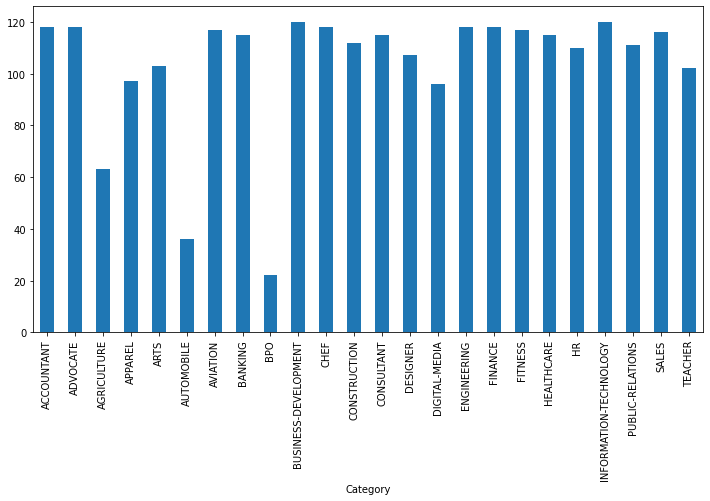

In [12]:
resume_data['Category'].value_counts().sort_index().plot(kind="bar",figsize=(12,6))

In [13]:
# Fetch the job descriptions from the job description data.
num_desc=15 # Number of job descriptions to fetch.

# Read the job description data from the CSV file.
job_description=pd.read_csv(r"E:\Projects\training_data.csv")

# Select 15 `num_desc` job descriptions.
job_description=job_description[["job_description","position_title"]][:num_desc]

In [14]:
# Preprocess the text of the job descriptions.
# This involves converting the text to lowercase, removing punctuation, and stop words, and lemmatizing the words.
job_description['Features']=job_description['job_description'].apply(lambda x : preprocess_text(x)['feature'])


In [15]:
# Select the first/any 15 job descriptions and preprocess the text.
# Prepare the job descriptions for training.
job_description=job_description[["job_description","position_title"]][:num_desc]
job_description['Features']=job_description['job_description'].apply(lambda x : preprocess_text(x)['feature'])


In [16]:
job_description.head()

,job_description,position_title,Features
0,minimum qualifications\nbachelors degree or eq...,Sales Specialist,minimum qualifications bachelors degree equiva...
1,description\nas an asc you will be highly infl...,Apple Solutions Consultant,description asc highly influential growing min...
2,its an amazing time to be joining netflix as w...,Licensing Coordinator - Consumer Products,amazing time joining netflix continue transfor...
3,description\n\nweb designers looking to expand...,Web Designer,description web designers looking expand profe...
4,at trackfive weve got big goals were on a miss...,Web Developer,trackfive weve got big goals mission revolutio...


# Step 4: Generate embeddings for the resumes and job descriptions.

In [17]:

from transformers import AutoModel, AutoTokenizer
import torch
# Load the BERT base uncased model and tokenizer.
device="cuda"if torch.cuda.is_available() else "cpu"

model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Move the model and tokenizer to the GPU for faster processing. 
model.to(device)


def get_embeddings(text):
    inputs = tokenizer(str(text), return_tensors="pt",truncation=True,padding=True).to(device)  # Tokenize the text and convert it to a PyTorch tensor.
    outputs = model(**inputs)    # Get the model's output.
     # Get the mean of the last hidden state of the model
    embeddings = outputs.last_hidden_state.mean(dim=1).detach().to("cpu").numpy() 
    return embeddings


In [19]:
# Calculate the cosine similarity between the job description embeddings and the resume embeddings.

# Import the cosine similarity function from scikit-learn.
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd


# Calculate embeddings for all job descriptions and resumes
job_desc_embeddings = np.array([get_embeddings(desc) for desc in job_description['Features']])
resume_embeddings = np.array([get_embeddings(text) for text in resume_data['Feature']])



In [20]:
# Squeeze the job description and resume embeddings to remove the extra dimension.
job_desc_embeddings=job_desc_embeddings.squeeze()
resume_embeddings=resume_embeddings.squeeze()
# Print the shape of the job description and resume embeddings.
resume_embeddings.shape,job_desc_embeddings.shape

((2484, 768), (15, 768))

In [21]:
# Initialize a Pandas DataFrame to store the results of the job recommendation system.
# The DataFrame has five columns:
# * jobId: The ID of the job.
# * resumeId: The ID of the resume.
# * similarity: The cosine similarity between the job description and the resume.
# * domainResume: The domain of the resume.
# * domainDesc: The domain of the job description.
result_df = pd.DataFrame(columns=['jobId', 'resumeId', 'similarity', 'domainResume', 'domainDesc'])
# Set the number of top resumes to recommend for each job.
k=5


In [22]:
# Iterate over the job descriptions and compute the cosine similarity between each job description and all resumes.
# For each job description, extract the top-k most similar resumes and add the relevant information to the result DataFrame.
for i, job_desc_emb in enumerate(job_desc_embeddings):
    job_desc_id = i
    job_title = job_description['position_title'].iloc[i]
     
    # Compute cosine similarities between the current job description and all resumes.
    similarities = cosine_similarity([job_desc_emb], resume_embeddings )

    # Get the indices of the top-k most similar resumes.
    top_k_indices = np.argsort(similarities[0])[::-1][:k]
   
    # Extract the relevant information and add it to the result DataFrame.
    for j in top_k_indices:
        resume_id = resume_data['ID'].iloc[j]
        work_domain = resume_data['Category'].iloc[j]
        similarity_score = similarities[0][j]
        
        result_df.loc[i+j] = [job_desc_id, resume_id, similarity_score, work_domain,job_title ]
        

# Sort the results by similarity score (descending).
result_df = result_df.sort_values(by='similarity', ascending=False)



In [23]:
result_df.head()

,jobId,resumeId,similarity,domainResume,domainDesc
207,8,37664296,0.964158,DESIGNER,Web Designer
216,10,21283733,0.963998,DESIGNER,Web Developer
175,14,26790545,0.963242,DESIGNER,UI Web Designer
213,14,37664296,0.961985,DESIGNER,UI Web Designer
2370,10,79432080,0.961869,ARTS,Web Developer


In [24]:
result_group=result_df.groupby("jobId")
result_group

In [25]:
# Get the first group of results.
result_group.get_group(0)

,jobId,resumeId,similarity,domainResume,domainDesc
299,0,33381211,0.930880,INFORMATION-TECHNOLOGY,Sales Specialist
577,0,37521676,0.930776,BUSINESS-DEVELOPMENT,Sales Specialist
1235,0,17132168,0.930246,DIGITAL-MEDIA,Sales Specialist
1143,0,78016758,0.929602,CONSULTANT,Sales Specialist
1799,0,10624813,0.926079,ENGINEERING,Sales Specialist


In [26]:
# Print the top 15 resumes for each job description.

for i in range(num_desc):
    print()
    print("jobId---cosineSimilarity---domainResume---domainDesc")
    print(result_group.get_group(i).values[0])
    print()


jobId---cosineSimilarity---domainResume---domainDesc
[0 33381211 0.9308804273605347 'INFORMATION-TECHNOLOGY' 'Sales Specialist']


jobId---cosineSimilarity---domainResume---domainDesc
[1 18905648 0.8815364837646484 'DIGITAL-MEDIA'
 'Apple Solutions Consultant']


jobId---cosineSimilarity---domainResume---domainDesc
[2 36758947 0.9561582207679749 'ARTS'
 'Licensing Coordinator - Consumer Products']


jobId---cosineSimilarity---domainResume---domainDesc
[3 46258701 0.9254279136657715 'HR' 'Web Designer']


jobId---cosineSimilarity---domainResume---domainDesc
[4 13727873 0.9483728408813477 'PUBLIC-RELATIONS' 'Web Developer']


jobId---cosineSimilarity---domainResume---domainDesc
[5 18905648 0.8790102005004883 'DIGITAL-MEDIA' 'Frontend Web Developer']


jobId---cosineSimilarity---domainResume---domainDesc
[6 38565119 0.9573701024055481 'DESIGNER' 'Remote Website Designer']


jobId---cosineSimilarity---domainResume---domainDesc
[7 12632728 0.5323573350906372 'BUSINESS-DEVELOPMENT' 'Web Des

# -------------------------------FINISHED----------------------------------------